### Parse `Common Rig`

In [1]:
import mujoco
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import torch
import scipy
from mujoco_parser import MuJoCoParserClass
from amp.tasks.amp.common_rig_amp_base import DOF_OFFSETS
from amp.utils.torch_jit_utils import *
from util import rpy2r,r2quat

np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo version:[%s]"%(mujoco.__version__))

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2023-09-06 10:10:50,092 - INFO - logger - logger initialized


Error: FBX library failed to load - importing FBX data will not succeed. Message: No module named 'fbx'
FBX tools must be installed from https://help.autodesk.com/view/FBX/2020/ENU/?guid=FBX_Developer_Help_scripting_with_python_fbx_installing_python_fbx_html
MuJoCo version:[2.3.2]


<unknown>:3: DeprecationWarning: invalid escape sequence \*
/Users/yoonbyung/opt/anaconda3/envs/snapbot/lib/python3.9/site-packages/matplotlib_inline/config.py:75: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


### Parse `scene_common_rig`

In [2]:
xml_path = '../asset/common_rig/scene_common_rig.xml'
env = MuJoCoParserClass(name='Snapbot',rel_xml_path=xml_path,VERBOSE=True)
print ("[%s] parsed."%(env.name))

dt:[0.0050] HZ:[200]
n_dof (=nv):[41]
n_geom:[26]
geom_names:['floor', 'base', 'root2spine', 'spine2neck', 'neck2rshoulder', 'neck2lshoulder', 'rshoulder2relbow', 'relbow2rwrist', 'rthumb', 'rpalm', 'lshoulder2lelbow', 'lelbow2lwrist', 'lthumb', 'lpalm', 'head', 'nose', 'base2rpelvis', 'rpelvis2rknee', 'rknee2rankle', 'rankle', 'rfoot', 'base2lpelvis', 'lpelvis2lknee', 'lknee2lankle', 'lankle', 'lfoot']
n_body:[20]
body_names:['world', 'base', 'torso', 'spine', 'neck', 'right_shoulder', 'right_elbow', 'right_hand', 'left_shoulder', 'left_elbow', 'left_hand', 'head', 'right_leg', 'right_pelvis', 'right_knee', 'right_ankle', 'left_leg', 'left_pelvis', 'left_knee', 'left_ankle']
n_joint:[36]
joint_names:['base', 'root1', 'root2', 'root3', 'spine', 'rs1', 'rs2', 'rs3', 're', 'rw1', 'rw2', 'rw3', 'ls1', 'ls2', 'ls3', 'le', 'lw1', 'lw2', 'lw3', 'head1', 'head2', 'head3', 'rp1', 'rp2', 'rp3', 'rk', 'ra1', 'ra2', 'ra3', 'lp1', 'lp2', 'lp3', 'lk', 'la1', 'la2', 'la3']
joint_types:[0 3 3 3 3 3 3

### Load motion

In [3]:
motion_file_path = os.path.join("../asset/common_rig/motion/VAAI_swing.npy")
device='cpu'

In [4]:
from amp.utils.motion_lib import MotionLib
motion_lib = MotionLib(motion_file=motion_file_path,
                       num_dofs=env.n_rev_joint,
                       key_body_ids=np.array([]),
                       device=device)

Loading 1/1 motion files: ../asset/common_rig/motion/VAAI_swing.npy
[[ 0.02 -0.03 -0.01 ... -0.01 -0.09 -0.15]
 [ 0.02 -0.02 -0.01 ... -0.01 -0.09 -0.15]
 [ 0.02 -0.02 -0.02 ... -0.01 -0.09 -0.15]
 ...
 [ 0.01 -0.01 -0.02 ... -0.02  0.02 -0.13]
 [ 0.01 -0.02 -0.02 ... -0.02  0.02 -0.13]
 [ 0.01 -0.02 -0.02 ... -0.02  0.02 -0.13]] [[ 0.01  0.04  0.   ... -0.01  0.07  0.01]
 [ 0.01  0.01 -0.01 ... -0.01  0.01  0.02]
 [ 0.01  0.01 -0.   ... -0.    0.    0.02]
 ...
 [-0.   -0.   -0.01 ... -0.    0.   -0.  ]
 [-0.    0.    0.   ... -0.   -0.    0.  ]
 [-0.    0.    0.   ... -0.   -0.    0.  ]]
Loaded 1 motions with a total length of 28.550s.


### Kinematic Sampling Simulation

/Users/yoonbyung/Dev/yet-another-mujoco-tutorial-v3/code/amp/utils/motion_lib.py:307: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frame_idx0 = (phase * (num_frames - 1)).astype(np.int)


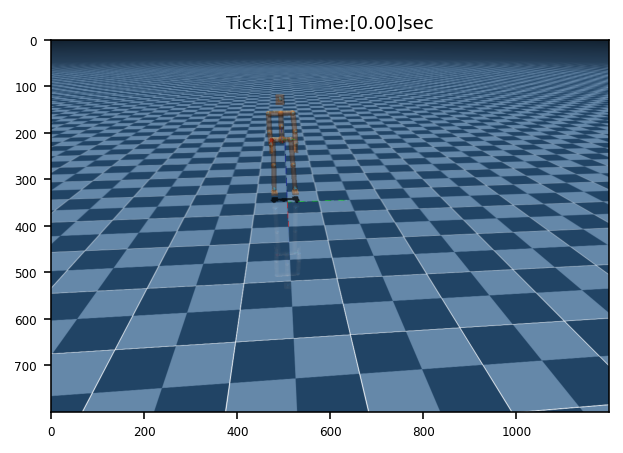

2023-09-06 10:10:51.007 python[7831:4614833] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


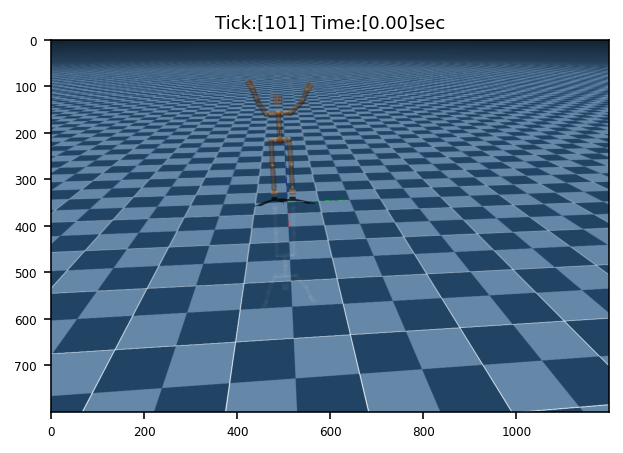

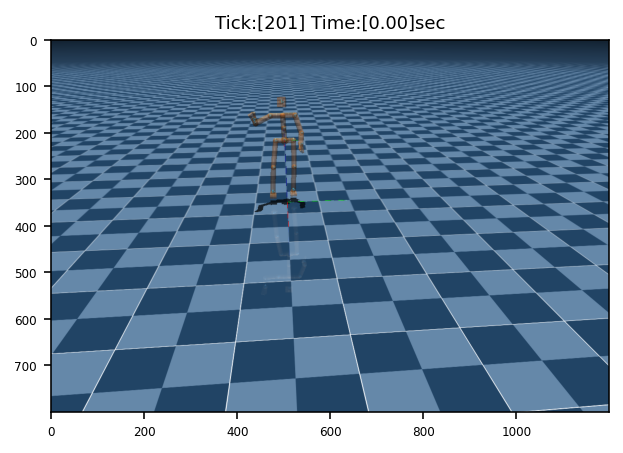

Done.


In [5]:
env.init_viewer(viewer_title='Snapbot',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True)
env.update_viewer(azimuth=174.08,distance=0.7,elevation=-23,lookat=[6.1,0.05,2.16],
                  VIS_TRANSPARENT=True,VIS_CONTACTPOINT=True,
                  contactwidth=0.2,contactheight=0.1,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=True,jointlength=0.5,jointwidth=0.1,jointrgba=[0.2,0.6,0.8,0.6])
env.reset()
t = 0 # timestep
motion_time = 0

while (env.get_sim_time() < 10.0) and env.is_viewer_alive():
    tic = time.time()
    # root_pos = root_motion[t, :3]
    # root_rot = root_motion[t, 3:6]
    root_pos, root_rot, dof_pos, root_vel, root_ang_vel, dof_vel, key_pos = motion_lib.get_motion_state(motion_ids=[0], motion_times=motion_time)

    temp = dof_pos.clone()
    # for j in range(num_joints):
    #     dof_offset = DOF_OFFSETS[j]
    #     dof_size = DOF_OFFSETS[j + 1] - DOF_OFFSETS[j]
    #     if (dof_size == 3):
    #         # dof_pos[0, [dof_offset,dof_offset+2,dof_offset+1]] = euler_xyz_to_exp_map(dof_pos[0, dof_offset], dof_pos[0, dof_offset+2], dof_pos[0, dof_offset+1])
    #         quat = quat_from_euler_xyz2(dof_pos[0, dof_offset+0], dof_pos[0, dof_offset+1], dof_pos[0, dof_offset+2]) # zyx order
    #         r, p, y = get_euler_xyz(quat[[0,1,2,3]].unsqueeze(0))
    #         dof_pos[0, dof_offset] = r
    #         dof_pos[0, dof_offset+1] = p
    #         dof_pos[0, dof_offset+2] = y
    
    # Render origin and base
    jntadr = env.model.body('base').jntadr[0]
    qposadr = env.model.jnt_qposadr[jntadr]
    root_pos[:,2] -= 1.8
    env.data.qpos[qposadr:qposadr+3] = root_pos[0]
    env.data.qpos[qposadr+3:qposadr+7] = root_rot[0, [3, 0, 1, 2]]
    joint_idxs_fwd = [env.model.joint(jname).qposadr[0] for jname in env.rev_joint_names]
    env.forward(q=np.array(dof_pos[0]),joint_idxs=env.ctrl_joint_idxs)

    p_torso,R_torso = env.get_pR_body(body_name='torso')
    env.plot_T(p=np.zeros(3),R=np.eye(3,3),PLOT_AXIS=True,axis_len=1.0,axis_width=0.0025)
    env.plot_T(p=p_torso,R=R_torso,PLOT_AXIS=True,axis_len=0.2,axis_width=0.0025)
    # Render contact information
    PLOT_CONTACT = False
    if PLOT_CONTACT:
        p_contacts,f_contacts,geom1s,geom2s = env.get_contact_info()
        for (p_contact,f_contact,geom1,geom2) in zip(p_contacts,f_contacts,geom1s,geom2s):
            f_norm = np.linalg.norm(f_contact)
            f_uv = f_contact / (f_norm+1e-8)
            f_len = 0.2 # f_norm*0.05
            label = '[%s]-[%s]'%(geom1,geom2)
            env.plot_arrow(p=p_contact,uv=f_uv,r_stem=0.01,len_arrow=f_len,rgba=[1,0,0,0.4],label='')
            env.plot_arrow(p=p_contact,uv=-f_uv,r_stem=0.01,len_arrow=f_len,rgba=[1,0,0,0.4],label='')
            env.plot_sphere(p=p_contact,r=0.0001,label=label)
    # Render sensor locations
    for sensor_name in env.sensor_names:
        p_sensor,R_sensor = env.get_pR_sensor(sensor_name)
        env.plot_T(p=p_sensor,R=R_sensor,PLOT_AXIS=True,axis_len=0.05,axis_width=0.0025)
    # Render contacted sensor
    contact_idxs = np.where(env.get_sensor_values(sensor_names=env.sensor_names) > 1.0)[0]
    for idx in contact_idxs:
        sensor_name = env.sensor_names[idx]
        p_sensor = env.get_p_sensor(sensor_name)
        env.plot_sphere(p=p_sensor,r=0.02,rgba=[1,0,0,0.5])
    # Do render
    env.render()
    # Plot
    if env.loop_every(HZ=2) or (env.tick == 1):
        scene_img = env.grab_image(resize_rate=0.5)
        plt.figure(figsize=(5,4)); plt.imshow(scene_img)
        plt.title("Tick:[%d] Time:[%.2f]sec"%(env.tick,env.get_sim_time()),fontsize=9)
        plt.show()
    toc = time.time() - tic
    if toc < 0.05:
        time.sleep(0.05 - toc)
        motion_time += 0.05
    else:
        print ("Warning: rendering is slower than 60Hz.")
    
  
# Close viewer
env.close_viewer()
print ("Done.")

### Watch single frame

In [6]:
env.init_viewer(viewer_title='Snapbot',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True)
env.update_viewer(azimuth=174.08,distance=0.7,elevation=-23,lookat=[6.1,0.05,2.16],
                  VIS_TRANSPARENT=True,VIS_CONTACTPOINT=True,
                  contactwidth=0.2,contactheight=0.1,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=True,jointlength=0.5,jointwidth=0.1,jointrgba=[0.2,0.6,0.8,0.6])

env.reset()
idx = 0
motion_times = 4.5 # select time
tic = time.time()
root_pos, root_rot, dof_pos, root_vel, root_ang_vel, dof_vel, key_pos = motion_lib.get_motion_state(motion_ids=[0], motion_times=motion_times)

# Render origin and base
jntadr = env.model.body('base').jntadr[0]
qposadr = env.model.jnt_qposadr[jntadr]
root_pos[:,2] -= 1.8
env.data.qpos[qposadr:qposadr+3] = root_pos[0]
env.data.qpos[qposadr+3:qposadr+7] = root_rot[0, [3, 0, 1, 2]]
env.forward(q=np.array(dof_pos[0]),joint_idxs=env.ctrl_joint_idxs)

p_torso,R_torso = env.get_pR_body(body_name='torso')
env.plot_T(p=np.zeros(3),R=np.eye(3,3),PLOT_AXIS=True,axis_len=1.0,axis_width=0.0025)
env.plot_T(p=p_torso,R=R_torso,PLOT_AXIS=True,axis_len=0.2,axis_width=0.0025)
# Render contact information
PLOT_CONTACT = False
if PLOT_CONTACT:
    p_contacts,f_contacts,geom1s,geom2s = env.get_contact_info()
    for (p_contact,f_contact,geom1,geom2) in zip(p_contacts,f_contacts,geom1s,geom2s):
        f_norm = np.linalg.norm(f_contact)
        f_uv = f_contact / (f_norm+1e-8)
        f_len = 0.2 # f_norm*0.05
        label = '[%s]-[%s]'%(geom1,geom2)
        env.plot_arrow(p=p_contact,uv=f_uv,r_stem=0.01,len_arrow=f_len,rgba=[1,0,0,0.4],label='')
        env.plot_arrow(p=p_contact,uv=-f_uv,r_stem=0.01,len_arrow=f_len,rgba=[1,0,0,0.4],label='')
        env.plot_sphere(p=p_contact,r=0.0001,label=label)
# Render sensor locations
for sensor_name in env.sensor_names:
    p_sensor,R_sensor = env.get_pR_sensor(sensor_name)
    env.plot_T(p=p_sensor,R=R_sensor,PLOT_AXIS=True,axis_len=0.05,axis_width=0.0025)
# Render contacted sensor
contact_idxs = np.where(env.get_sensor_values(sensor_names=env.sensor_names) > 1.0)[0]
for idx in contact_idxs:
    sensor_name = env.sensor_names[idx]
    p_sensor = env.get_p_sensor(sensor_name)
    env.plot_sphere(p=p_sensor,r=0.02,rgba=[1,0,0,0.5])
# Do render
while env.is_viewer_alive():
    env.render()
    
  
# Close viewer
env.close_viewer()
print ("Done.")

Done.


In [7]:
env.close_viewer()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import os.path as osp
from util import *

%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("Done.")

Done.


In [17]:
def kernel_se(X1,X2,hyp={'g':1,'l':1}):
    """
        Squared exponential (SE) kernel function
    """
    K = hyp['g']*np.exp(-cdist(X1,X2,'sqeuclidean')/(2*hyp['l']*hyp['l']))
    return K

def kernel_levse(X1,X2,L1,L2,hyp={'g':1,'l':1}):
    """
        Leveraged SE kernel function
    """
    K = hyp['g']*np.exp(-cdist(X1,X2,'sqeuclidean')/(2*hyp['l']*hyp['l']))
    L = np.cos(np.pi/2.0*cdist(L1,L2,'cityblock'))
    return np.multiply(K,L)

def soft_squash(x,x_min=-1,x_max=+1,margin=1.0):
    """
        Soft squashing numpy array
    """
    def th(z,m=0.0):
        # thresholding function 
        return (m)*(np.exp(2/m*z)-1)/(np.exp(2/m*z)+1)
    x_in = np.copy(x)
    idxs_upper = np.where(x_in>(x_max-margin))
    x_in[idxs_upper] = th(x_in[idxs_upper]-(x_max-margin),m=margin) + (x_max-margin)
    idxs_lower = np.where(x_in<(x_min+margin))
    x_in[idxs_lower] = th(x_in[idxs_lower]-(x_min+margin),m=margin) + (x_min+margin)
    return x_in
print ("Done.")

Done.


In [18]:
class GaussianRandomPathClass(object):
    def __init__(self,
                 name     = 'GRP',
                 kernel   = kernel_levse,
                 hyp_mean = {'g':1.0,'l':1.0,'w':1e-6},
                 hyp_var  = {'g':1.0,'l':1.0,'w':1e-6}
                 ):
        super(GaussianRandomPathClass,self).__init__()
        self.name = name
        # Set kernel
        self.kernel   = kernel     # kernel function
        self.hyp_mean = hyp_mean
        self.hyp_var  = hyp_var
        # Default set data
        self.set_data()
        
    def set_data(self,
                 t_anchor     = np.linspace(start=0.0,stop=1.0,num=10).reshape((-1,1)),
                 x_anchor     = np.zeros((10,3)),
                 l_anchor     = np.ones((10,1)),
                 t_test       = np.linspace(start=0.0,stop=1.0,num=100).reshape((-1,1)),
                 l_test       = np.ones((100,1)),
                 hyp_mean     = None,
                 hyp_var      = None,
                 w_chol       = 1e-10,     # noise for Cholesky transform
                 APPLY_EPSRU  = False,     # epsilon run-up
                 t_eps        = 0.0001,
                 l_eps        = 1.0,       # leverage for epsilon run-up
                 x_diff_start = None,
                 x_diff_end   = None,
                 SKIP_GP_VAR  = False      # skip GP variance computation
                 ):
        """
            Set anchor data to GRP class
        """
        self.t_anchor    = t_anchor.astype(float)    # [N x 1]
        self.x_anchor    = x_anchor.astype(float)    # [N x D]
        self.t_test      = t_test.astype(float)      # [N_test x 1]
        self.n_anchor    = self.x_anchor.shape[0]
        self.d_anchor    = self.x_anchor.shape[1]
        self.l_anchor    = l_anchor.astype(float)    # [N x 1]
        self.n_test      = self.t_test.shape[0]
        self.l_test      = l_test.astype(float)      # [N_test x 1]
        if hyp_mean is not None: self.hyp_mean = hyp_mean
        if hyp_var is not None: self.hyp_var = hyp_var

        # Handle epsilon greedy algorithm
        self.APPLY_EPSRU = APPLY_EPSRU
        self.t_eps       = t_eps
        if self.APPLY_EPSRU:
            # Append runup points
            if (x_diff_start is not None) and (x_diff_end is not None):
                self.x_diff_start = x_diff_start
                self.x_diff_end   = x_diff_end
            else:
                self.x_diff_start = (self.x_anchor[-1,:]-self.x_anchor[0,:]).reshape((1,-1))
                self.x_diff_end = (self.x_anchor[-1,:]-self.x_anchor[0,:]).reshape((1,-1))
            self.t_dur  = (self.t_anchor[-1]-self.t_anchor[0]).squeeze()
            # Append 'x_anchor'
            x_anchor    = self.x_anchor
            x_anchor    = np.insert(x_anchor,1,
                                    x_anchor[0,:]+self.t_eps/self.t_dur*self.x_diff_start,axis=0)
            x_anchor    = np.insert(x_anchor,-1,
                                    x_anchor[-1,:]-self.t_eps/self.t_dur*self.x_diff_end,axis=0)
            n_anchor    = self.x_anchor.shape[0]
            # Append 'x_anchor'
            t_anchor    = self.t_anchor
            t_anchor    = np.insert(t_anchor,1,t_anchor[0,:]+self.t_eps,axis=0)
            t_anchor    = np.insert(t_anchor,-1,t_anchor[-1,:]-self.t_eps,axis=0)
            # Append 'l_anchor'
            l_anchor    = self.l_anchor
            l_eps       = 0.0
            l_anchor    = np.insert(l_anchor,1,l_eps,axis=0)
            l_anchor    = np.insert(l_anchor,-1,l_eps,axis=0)
            # Overwrite 'x_anchor', 't_anchor', 'l_anchor', and 'n_anchor'
            self.x_anchor = x_anchor
            self.t_anchor = t_anchor
            self.n_anchor = self.x_anchor.shape[0]
            if self.kernel.__name__ == 'kernel_levse': # leveraged SE kernel
                self.l_anchor = l_anchor
                
        # GP mean-related
        if self.kernel.__name__ == 'kernel_levse': # leveraged SE kernel
            l_anchor_mean = np.ones((self.n_anchor,1)) # leverage does not affect GP mean
            self.k_test_anchor_mean   = self.kernel(self.t_test,self.t_anchor,
                                                    self.l_test,l_anchor_mean,
                                                    self.hyp_mean)
            self.K_anchor_anchor_mean = self.kernel(self.t_anchor,self.t_anchor,
                                                    l_anchor_mean,l_anchor_mean,
                                                    self.hyp_mean) \
                                        + self.hyp_mean['w']*np.eye(self.n_anchor)
        elif self.kernel.__name__ == 'kernel_se': # SE kernel
            self.k_test_anchor_mean   = self.kernel(self.t_test,self.t_anchor,
                                                    self.hyp_mean)
            self.K_anchor_anchor_mean = self.kernel(self.t_anchor,self.t_anchor,
                                                    self.hyp_mean) \
                                        + self.hyp_mean['w']*np.eye(self.n_anchor)
        else:
            raise TypeError("[GaussianRandomPathClass] Unsupported kernel:[%s]"%
                            (self.kernel.__name__))
        self.x_anchor_mean        = self.x_anchor.mean(axis=0)
        self.gamma_test           = np.linalg.solve(self.K_anchor_anchor_mean,
                                                    self.x_anchor-self.x_anchor_mean)
        self.mean_test            = np.matmul(self.k_test_anchor_mean,self.gamma_test) \
                                    + self.x_anchor_mean
        
        # GP variance-related
        self.SKIP_GP_VAR = SKIP_GP_VAR
        if self.SKIP_GP_VAR: return # skip in case of computing the mean only 
        if self.kernel.__name__ == 'kernel_levse': # leveraged SE kernel
            self.k_test_test_var     = self.kernel(self.t_test,self.t_test,
                                                   self.l_test,self.l_test,
                                                   self.hyp_var)
            self.k_test_anchor_var   = self.kernel(self.t_test,self.t_anchor,
                                                   self.l_test,self.l_anchor,
                                                   self.hyp_var)
            self.K_anchor_anchor_var = self.kernel(self.t_anchor,self.t_anchor,
                                                   self.l_anchor,self.l_anchor,
                                                   self.hyp_var) \
                                        + self.hyp_mean['w']*np.eye(self.n_anchor)
        elif self.kernel.__name__ == 'kernel_se': # SE kernel
            self.k_test_test_var     = self.kernel(self.t_test,self.t_test,
                                                   self.hyp_var)
            self.k_test_anchor_var   = self.kernel(self.t_test,self.t_anchor,
                                                   self.hyp_var)
            self.K_anchor_anchor_var = self.kernel(self.t_anchor,self.t_anchor,
                                                   self.hyp_var) \
                                        + self.hyp_mean['w']*np.eye(self.n_anchor)
        else:
            raise TypeError("[GaussianRandomPathClass] Unsupported kernel:[%s]"%
                            (self.kernel.__name__))
        self.var_test            = self.k_test_test_var - np.matmul(self.k_test_anchor_var,
            np.linalg.solve(self.K_anchor_anchor_var,self.k_test_anchor_var.T))
        # yoon0-0
        # prev_anchor = self.x_anchor[0]
        # for i, anchor in enumerate(self.x_anchor):
        #     if np.absolute(prev_anchor[2] - anchor[2]) > 0.0001:
        #         # self.l_anchor[i,0] = 1.
        #         self.var_test[i,:] /= 0.3
        #         self.var_test[:,i] /= 0.3
        #         # print(i)
        #     prev_anchor = anchor

        self.var_diag_test       = np.diag(self.var_test).reshape((-1,1))
        self.std_diag_test       = np.sqrt(self.var_diag_test)
        self.w_chol              = w_chol
        self.var_chol_test       = np.linalg.cholesky(self.var_test \
                                                      + self.w_chol*np.eye(self.n_test))
            
    def sample(self,
               n_sample  = 10,
               rand_type = 'Gaussian'):
        """
            Sample from GRP
        """
        samples = []
        for s_idx in range(n_sample):
            if rand_type == 'Gaussian':
                R = np.random.randn(self.n_test,self.d_anchor)
            elif rand_type == 'Uniform':
                rand_gain = 3 # -gain ~ +gain
                R = rand_gain*(2*np.random.rand(self.n_test,self.d_anchor)-1)
            else:
                raise TypeError("[GaussianRandomPathClass] Unsupported rand_type:[%s]"%(rand_type))
            sample = self.mean_test+np.matmul(self.var_chol_test,R)
            samples.append(sample)
        return samples,self.t_test
    
    def plot(self,
             n_sample  = 10,
             figsize   = (6,3),
             lw_sample = 1/4,
             ylim      = None,
             title_str = None,
             tfs       = 15,
             rand_type = 'Gaussian'):
        """
            Plot GRP
        """
        sampled_trajs,t_test = self.sample(n_sample=n_sample,rand_type=rand_type)
        colors = [plt.cm.Set1(i) for i in range(self.d_anchor)]
        for d_idx in range(self.d_anchor):
            color = colors[d_idx]
            plt.figure(figsize=figsize)
            # Plot sampled trajectories
            for s_idx in range(len(sampled_trajs)):
                sampled_traj = sampled_trajs[s_idx]
                plt.plot(self.t_test,sampled_traj[:,d_idx],'-',color='k',lw=lw_sample)
            # Plot mean
            plt.plot(self.t_test,self.mean_test[:,d_idx],'-',color=color,lw=3)
            # Plot anchors
            plt.plot(self.t_anchor,self.x_anchor[:,d_idx],'o',mfc='none',ms=10,mec='k')
            # Plot 2-standard deviation (95%)
            plt.fill_between(self.t_test.squeeze(),
                             self.mean_test[:,d_idx]-2*self.std_diag_test.squeeze(),
                             self.mean_test[:,d_idx]+2*self.std_diag_test.squeeze(),
                             facecolor=color,interpolate=True,alpha=0.2)
            if ylim is not None:
                plt.ylim(ylim)
            if title_str is None:
                plt.title("Dim-[%d]"%(d_idx),fontsize=tfs)
            else:
                plt.title("%s"%(title_str),fontsize=tfs)
            plt.show()
print ("Done.")

Done.


In [19]:
mean = motion_lib.get_motion(motion_id=0).q_pos[:,4:18]
env.ctrl_joint_names[4:18]
np.array(mean).shape

(572, 14)

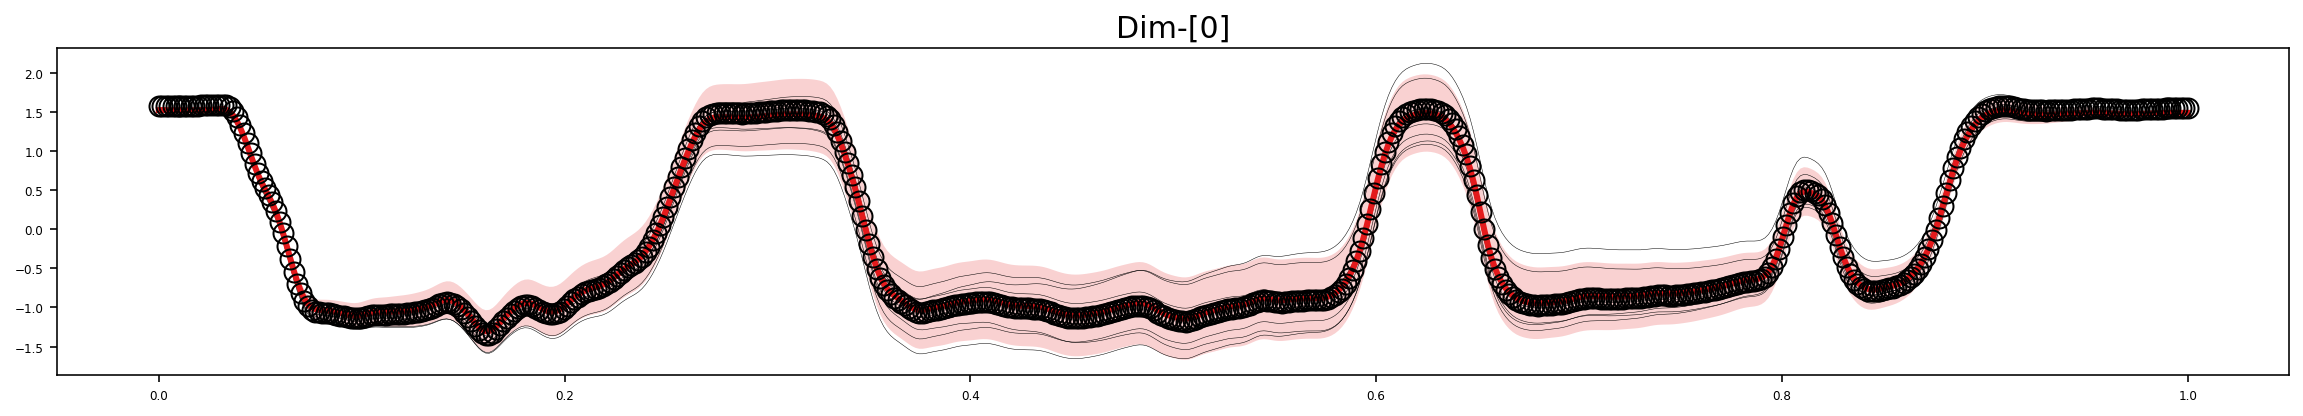

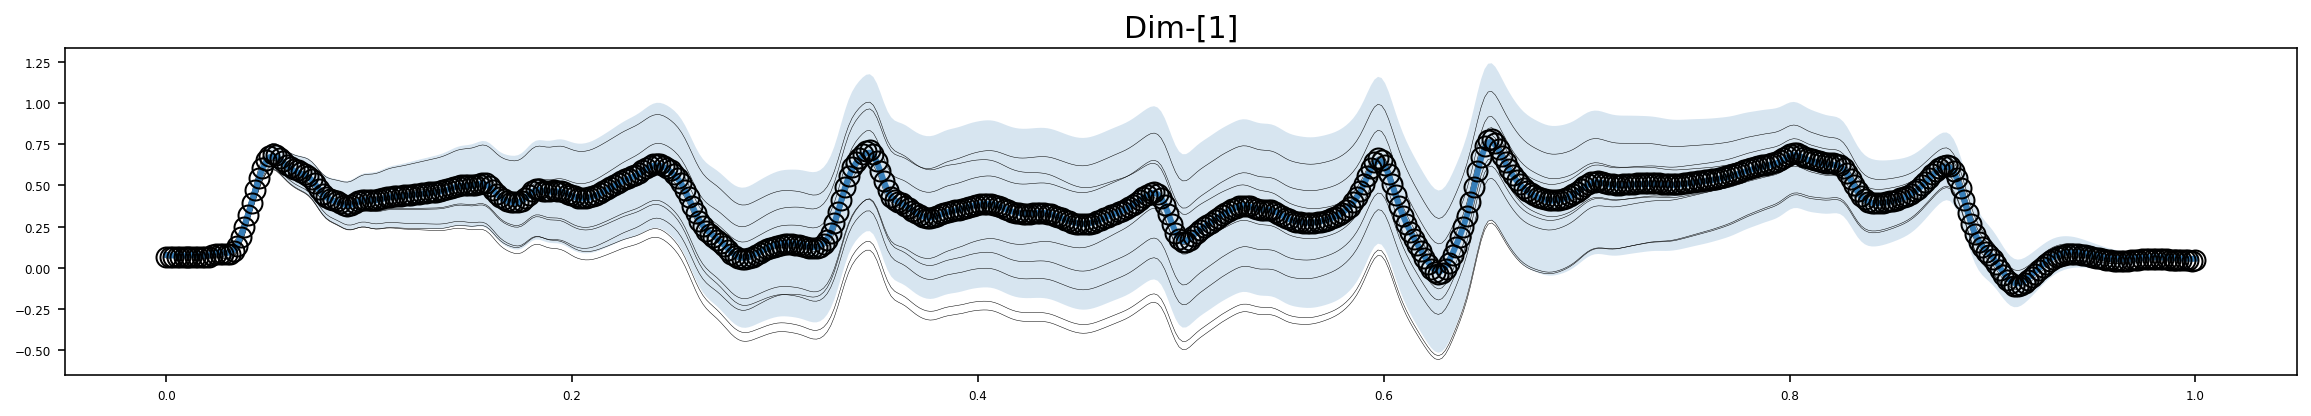

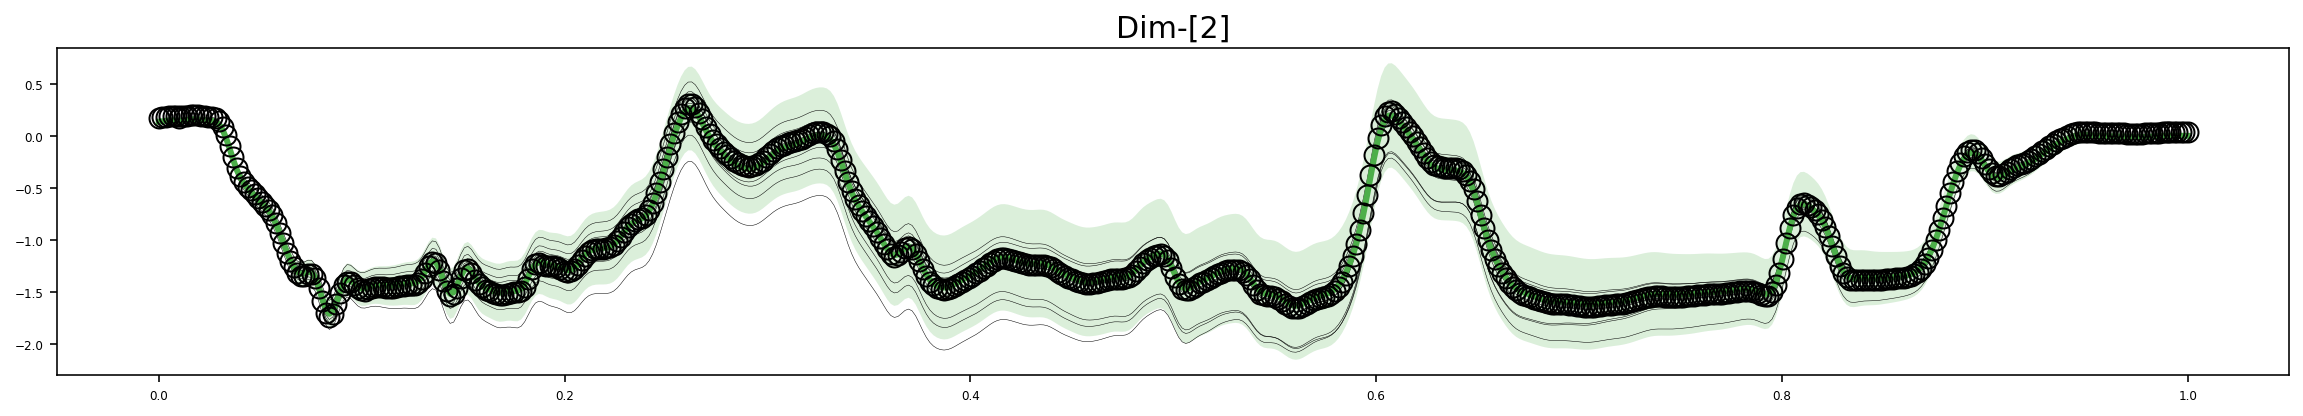

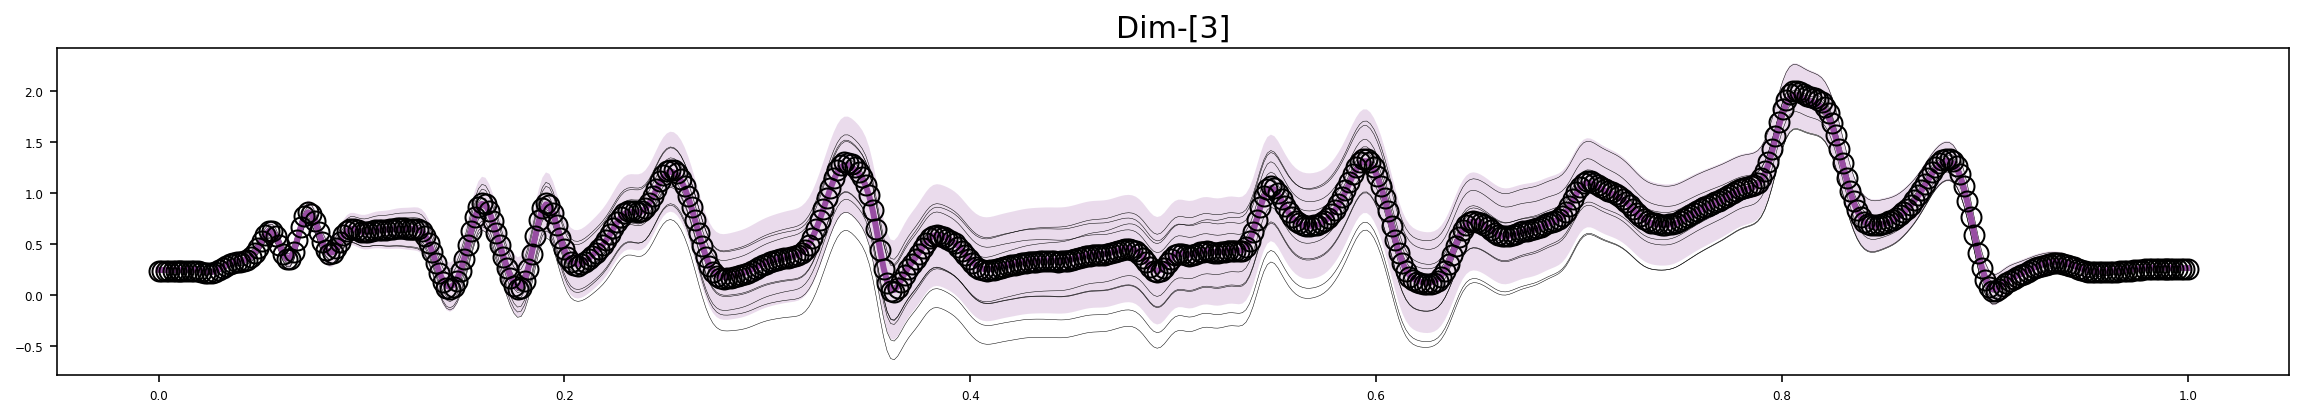

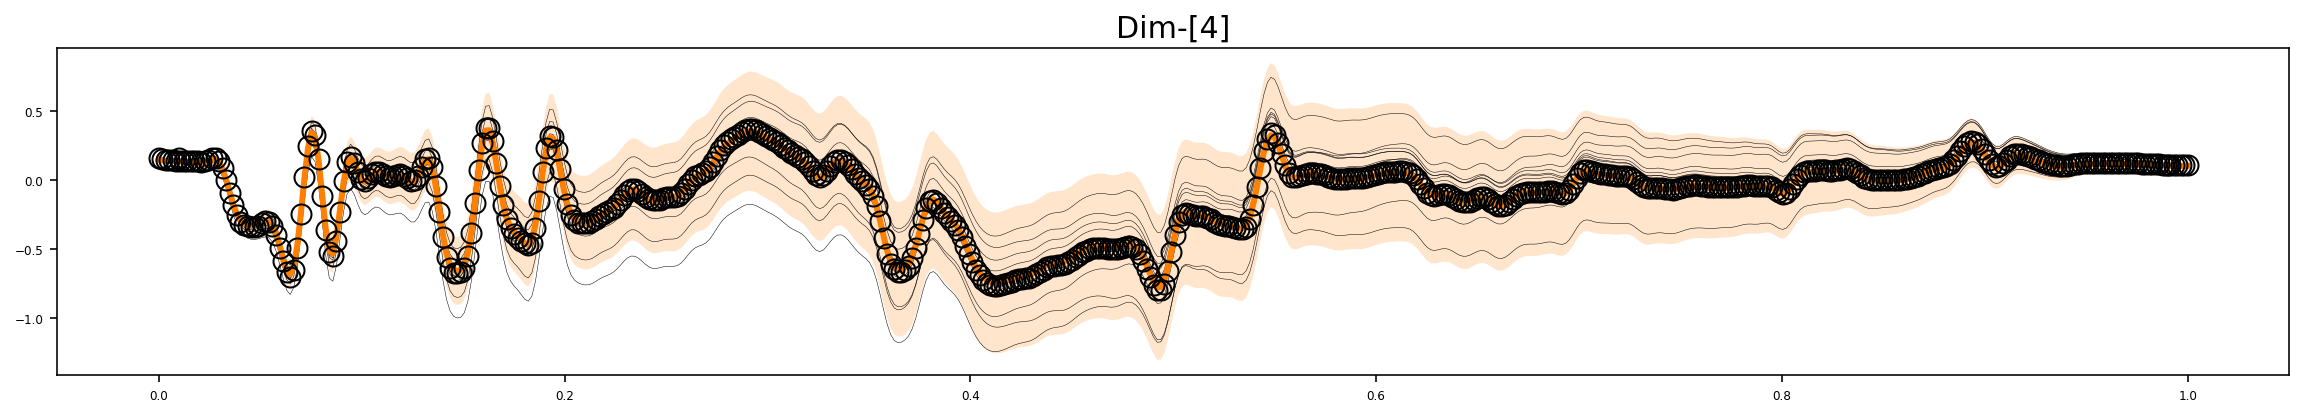

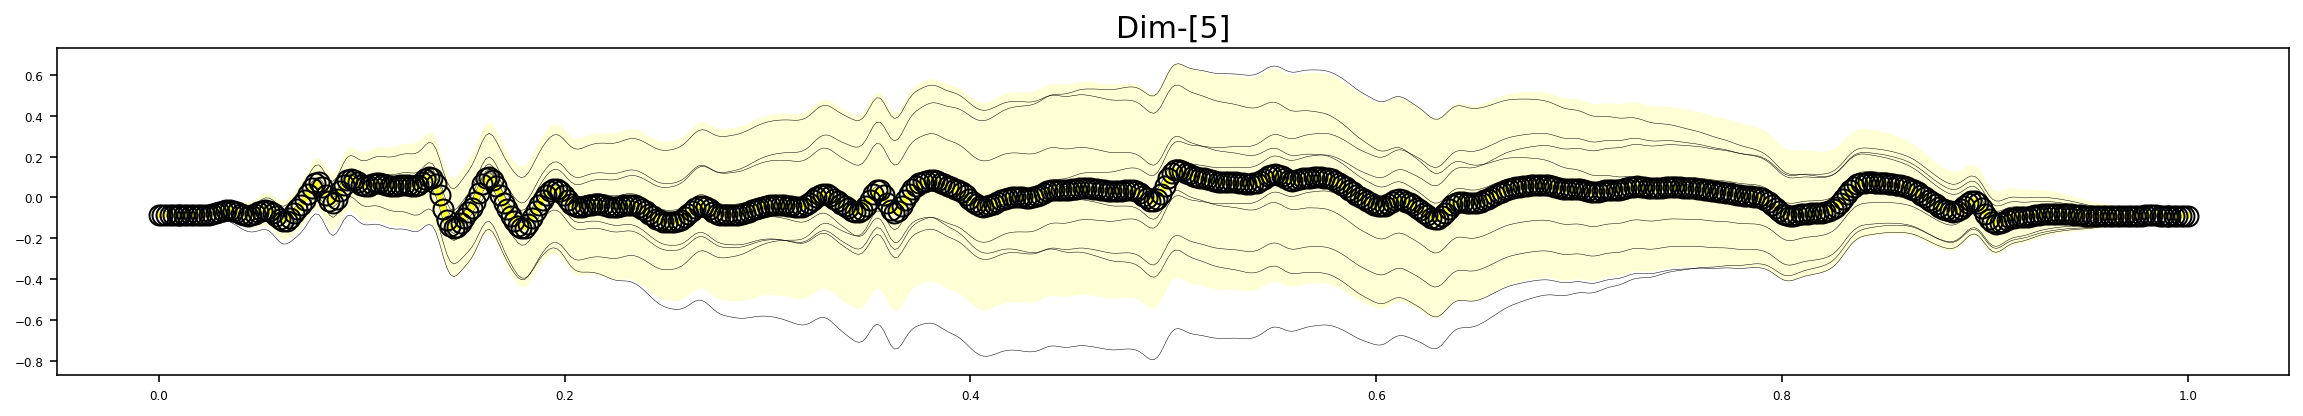

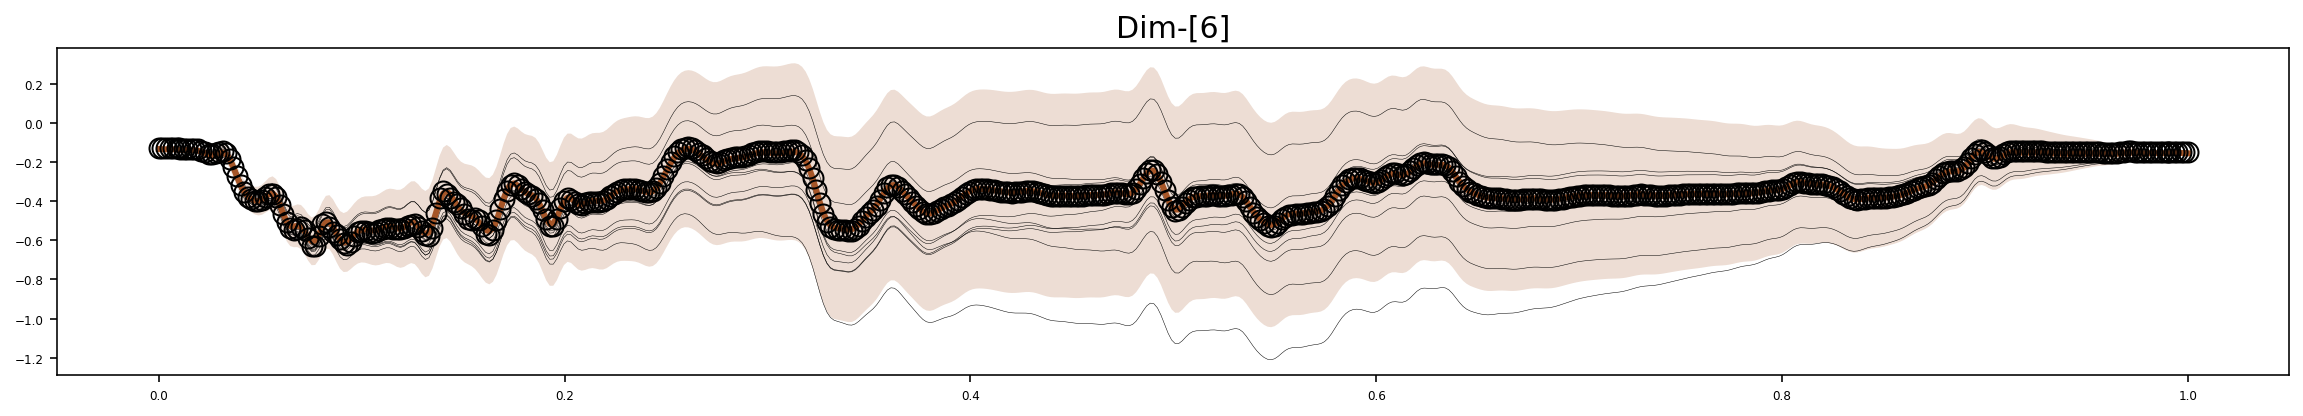

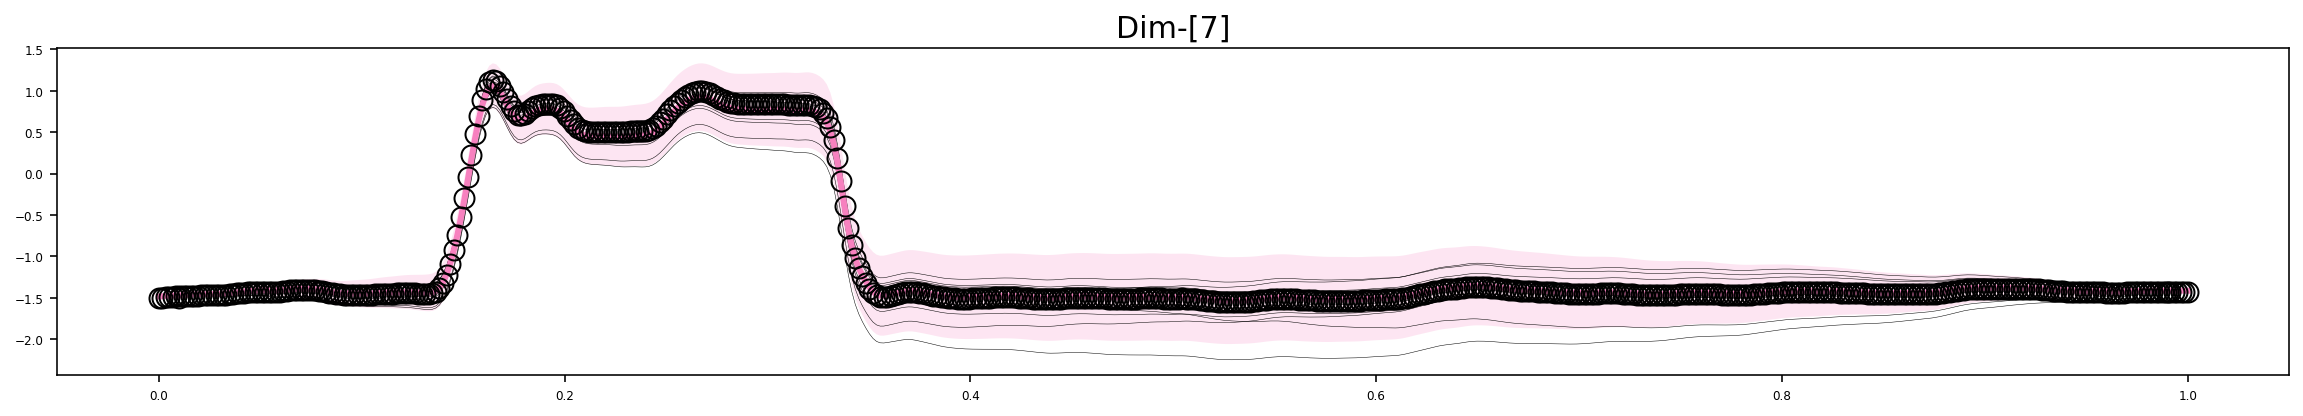

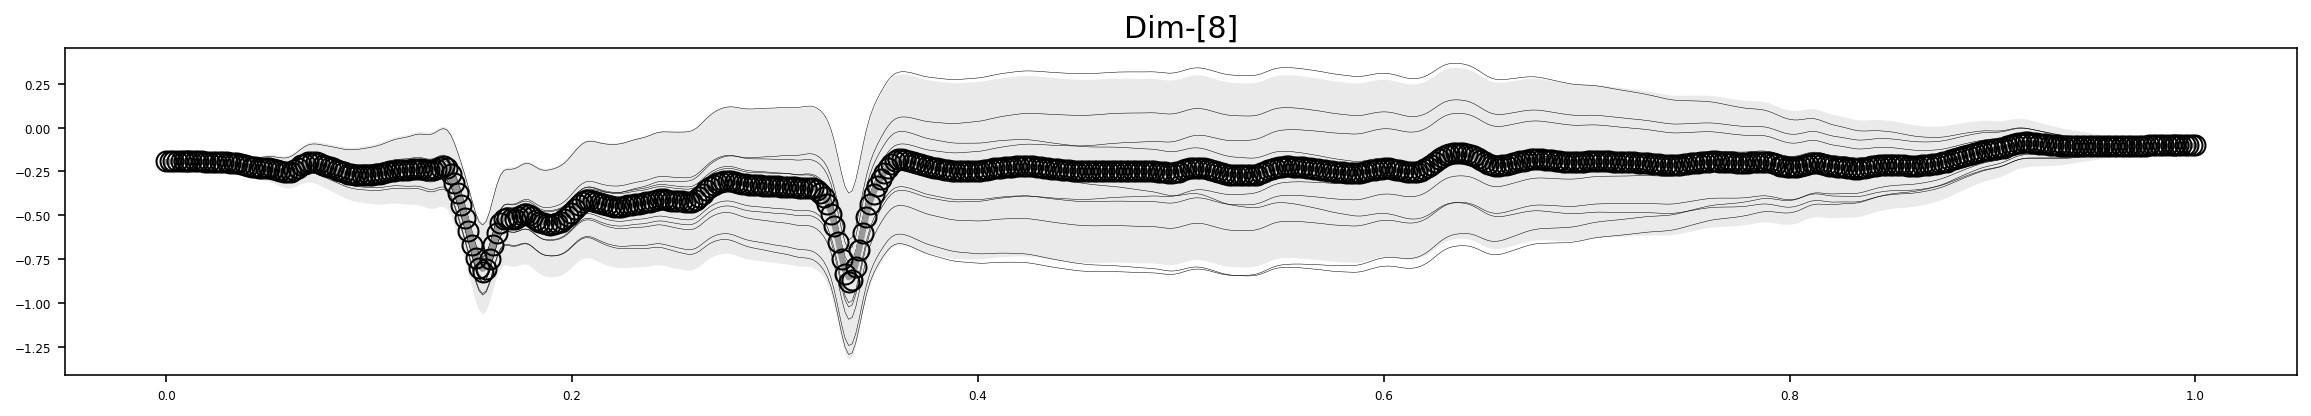

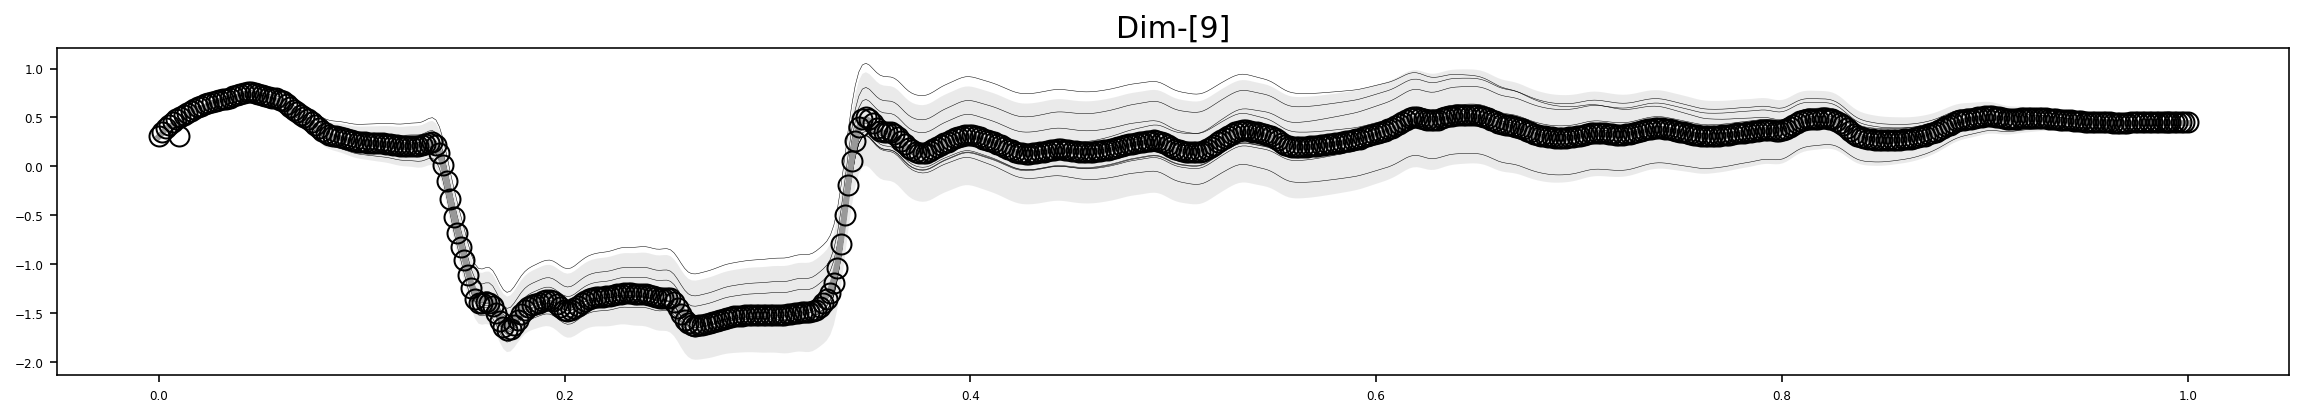

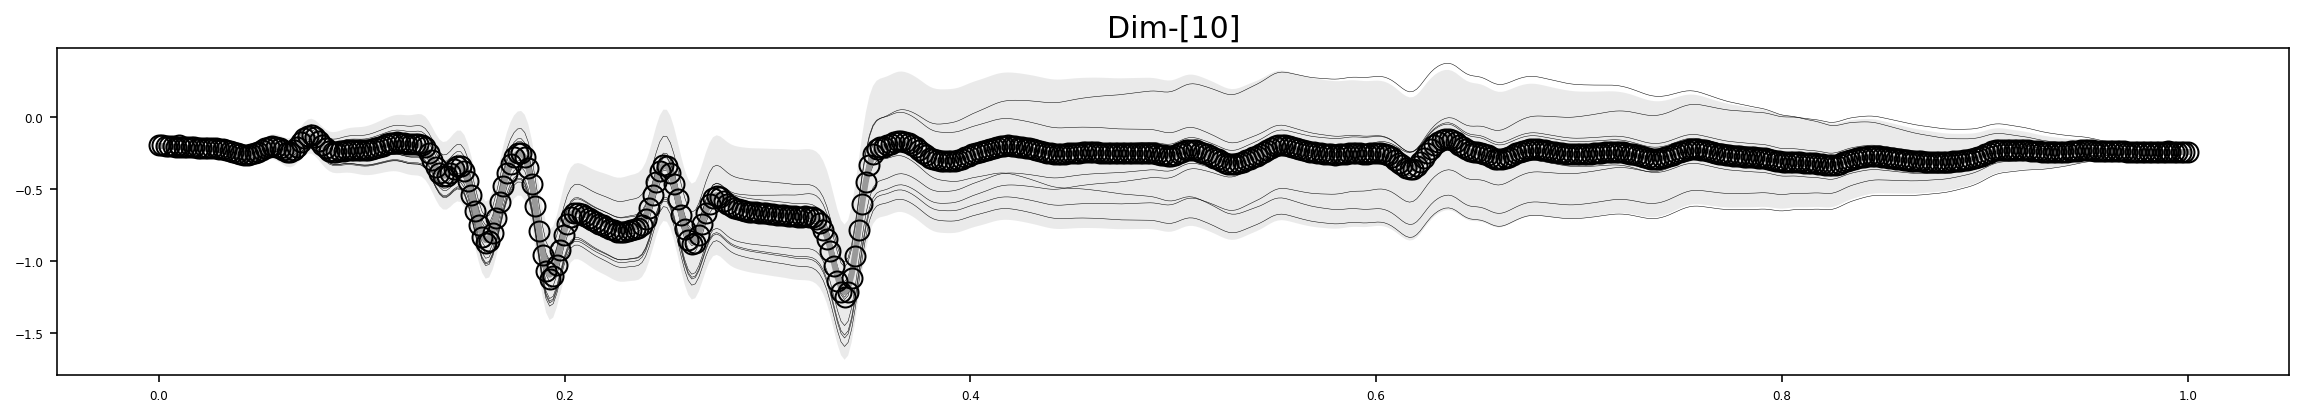

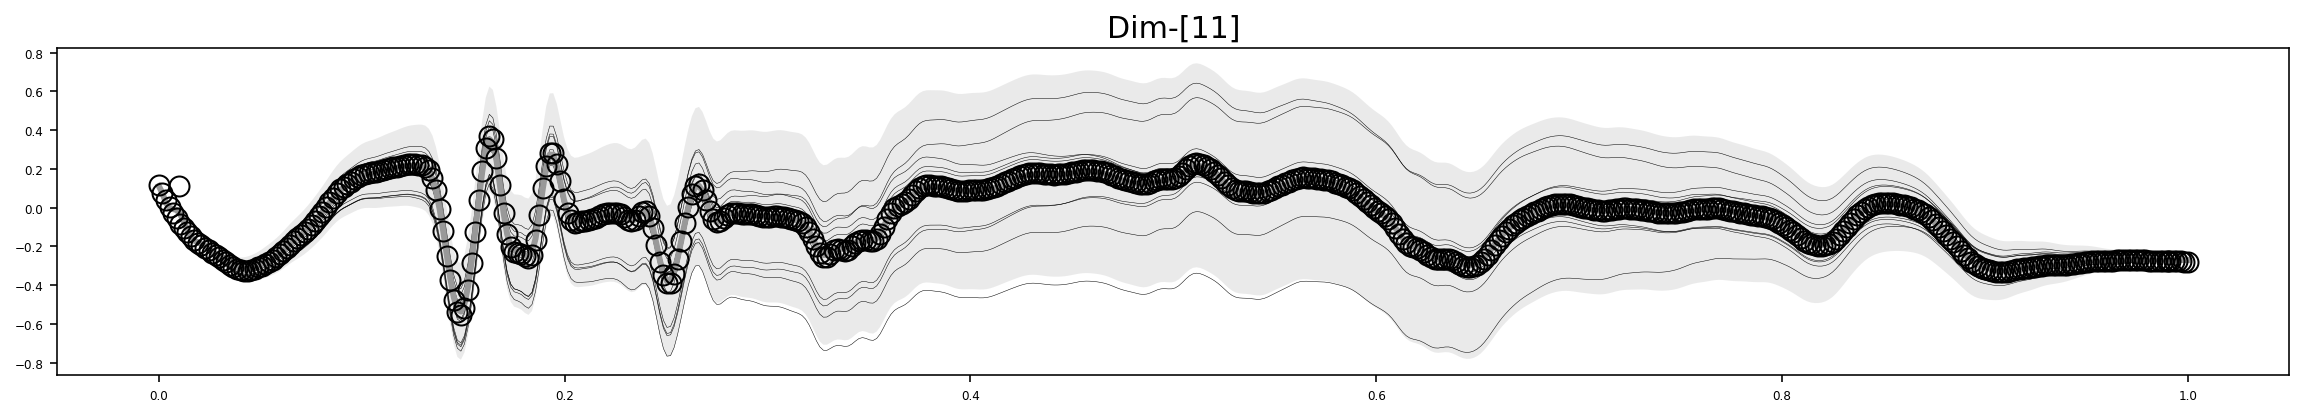

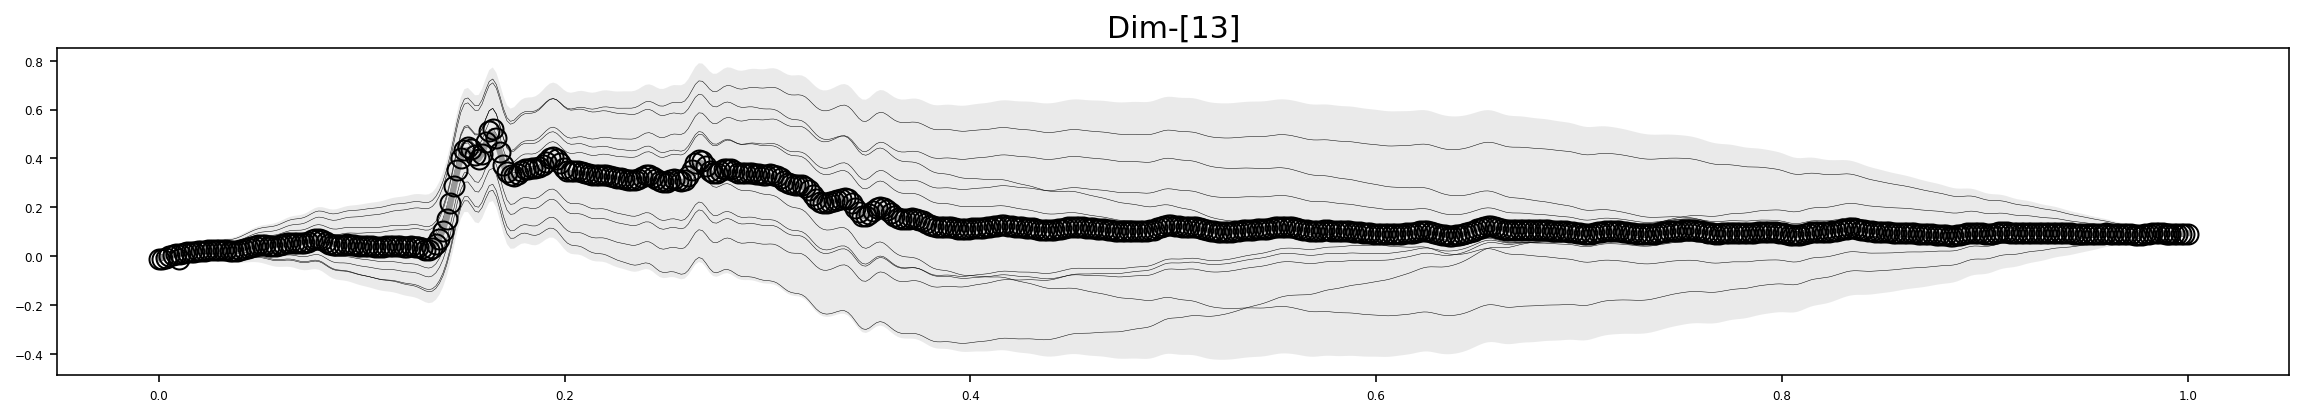

[GRP] ready.


In [25]:
G = GaussianRandomPathClass(name = 'GRP',kernel = kernel_levse)
# G.set_data(t_anchor    = np.linspace(start=0.0,stop=1.0,num=mean.shape[0]).reshape((-1,1)),
#            x_anchor    = np.array(mean),
#            t_test      = np.linspace(start=0.0,stop=1.0,num=100).reshape((-1,1)),
#            hyp_mean    = {'g':1.0,'l':0.5,'w':1e-6},
#            hyp_var     = {'g':1.0,'l':0.5,'w':1e-6},
#            APPLY_EPSRU = True,
#            t_eps       = 1e-2
#           )
G.set_data(t_anchor    = np.linspace(start=0.0,stop=1.0,num=mean.shape[0]).reshape((-1,1)),
            x_anchor    = np.array(mean),
            l_anchor    = np.ones((mean.shape[0],1)),#np.array([[1,0.5,1]]).T,
            t_test      = np.linspace(start=0.0,stop=1.0,num=572).reshape((-1,1)),
            l_test      = np.ones((572,1))/1.2,
            hyp_mean    = {'g':1,'l':1e-2,'w':1e-6},
            hyp_var     = {'g':1.2,'l':3e-1,'w':1e-6},
            APPLY_EPSRU = True,
            t_eps       = 1e-2
            )

G.plot(n_sample=10,figsize=(20,3),)
print ("[%s] ready."%(G.name))

### Sampled trajectory simulation

In [30]:
np.savez('sampled_trajectory2', qs=sampled_trajectory,root_pos=root_pos,root_rot=root_rot)

In [27]:
env.init_viewer(viewer_title='Snapbot',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True)
env.update_viewer(azimuth=174.08,distance=0.7,elevation=-23,lookat=[6.1,0.05,2.16],
                  VIS_TRANSPARENT=True,VIS_CONTACTPOINT=True,
                  contactwidth=0.2,contactheight=0.1,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=True,jointlength=0.5,jointwidth=0.1,jointrgba=[0.2,0.6,0.8,0.6])

# sampled_trajectory = G.sample(n_sample=1)[0][0]
sampled_trajectory = motion_lib.get_motion(motion_id=0).q_pos.copy()
sampled_trajectory[:,4:18] = G.sample(1)[0][0]

env.reset()
idx = 0

while (idx < sampled_trajectory.shape[0]) and env.is_viewer_alive():
    tic = time.time()
    root_pos, root_rot, dof_pos, root_vel, root_ang_vel, dof_vel, key_pos = motion_lib.get_motion_state(motion_ids=[0], motion_times=0.)

    # Render origin and base
    jntadr = env.model.body('base').jntadr[0]
    qposadr = env.model.jnt_qposadr[jntadr]
    root_pos[:,2] -= 1.9
    env.data.qpos[qposadr:qposadr+3] = root_pos[0]
    env.data.qpos[qposadr+3:qposadr+7] = root_rot[0, [3, 0, 1, 2]]
    # env.forward(q=np.array(sampled_trajectory[idx]),joint_idxs=env.ctrl_joint_idxs)
    env.forward(q=sampled_trajectory[idx],joint_idxs=env.ctrl_joint_idxs)
    
    p_torso,R_torso = env.get_pR_body(body_name='torso')
    env.plot_T(p=np.zeros(3),R=np.eye(3,3),PLOT_AXIS=True,axis_len=1.0,axis_width=0.0025)
    env.plot_T(p=p_torso,R=R_torso,PLOT_AXIS=True,axis_len=0.2,axis_width=0.0025)
    # Render contact information
    PLOT_CONTACT = False
    if PLOT_CONTACT:
        p_contacts,f_contacts,geom1s,geom2s,_,_ = env.get_contact_info()
        for (p_contact,f_contact,geom1,geom2) in zip(p_contacts,f_contacts,geom1s,geom2s):
            f_norm = np.linalg.norm(f_contact)
            f_uv = f_contact / (f_norm+1e-8)
            f_len = 0.2 # f_norm*0.05
            label = '[%s]-[%s]'%(geom1,geom2)
            env.plot_arrow(p=p_contact,uv=f_uv,r_stem=0.01,len_arrow=f_len,rgba=[1,0,0,0.4],label='')
            env.plot_arrow(p=p_contact,uv=-f_uv,r_stem=0.01,len_arrow=f_len,rgba=[1,0,0,0.4],label='')
            env.plot_sphere(p=p_contact,r=0.0001,label=label)
    # Render sensor locations
    p_contacts,f_contacts,geom1s,geom2s,_,_ = env.get_contact_info()
    
    for sensor_name in env.sensor_names:
        p_sensor,R_sensor = env.get_pR_sensor(sensor_name)
        env.plot_T(p=p_sensor,R=R_sensor,PLOT_AXIS=True,axis_len=0.05,axis_width=0.0025)
    # Render contacted sensor
    contact_idxs = np.where(env.get_sensor_values(sensor_names=env.sensor_names) > 1.0)[0]
    for idx in contact_idxs:
        sensor_name = env.sensor_names[idx]
        p_sensor = env.get_p_sensor(sensor_name)
        env.plot_sphere(p=p_sensor,r=0.02,rgba=[1,0,0,0.5])
    # Do render
    env.render()
    toc = time.time() - tic
    if toc < 0.05:
        time.sleep(0.05 - toc)
        idx += 1
    else:
        print ("Warning: rendering is slower than 60Hz.")
    
  
# Close viewer
env.close_viewer()
print ("Done.")

Done.


In [55]:
env.close_viewer()